## Compare grant abstract to publication abstract
Term frequency-inverse document frequency (tf-idf) is a common method of assessing the importance of a word in a document corpus. It weights the frequency of a given term in an individual document with the inverse frequency of that term in the entire corpus. We first use tf-idf to transform both abstract then compare the cosine similarity of the two.

In [ ]:
#import nltk, string
from sklearn.feature_extraction.text import TfidfVectorizer
from pandas import Series, DataFrame

tfidf_vectorizer = TfidfVectorizer()
def cosine_sim(text1, text2):
    tfidf = tfidf_vectorizer.fit_transform([text1, text2])
    return ((tfidf * tfidf.T).A)[0,1]

list1=[]
for i,j in dic1.items() :
        cosine=cosine_sim(i, j)
        list1.append(cosine)

cosine_sim = DataFrame(list1) 
cosine_sim.head()

join = pd.concat([col1_df, col2_df,col3_df,cosine_sim], axis=1)
join.head()

join.to_csv("cosine.csv")
print("done")

Let us look at what we get.

In [3]:
import numpy as np
import pandas as pd
from pandas import DataFrame
cosine = pd.read_csv("Abs_cosine_similarity.csv", encoding = "ISO-8859-1",
                usecols=["PMID","0"])
cosine.sort_values(["0"],ascending=[True], inplace=True)
cosine.head(10)

,PMID,0
4,24121441,0.136550
44,27050561,0.150984
36,23681158,0.152784
5,24121441,0.161347
16,26526853,0.168242
46,27050561,0.175705
30,24643422,0.180092
32,23681158,0.193749
31,23681158,0.204514
37,23238908,0.221224


In [4]:
cosine.reset_index(level=0, inplace=True)
cosine.reset_index(level=0, inplace=True)

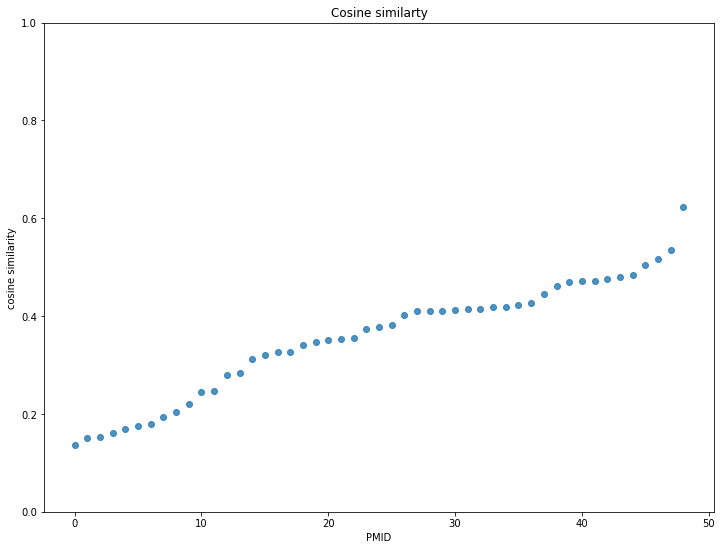

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax1 = plt.subplots(figsize=(12,9))
ax1 = plt.subplot()
ax1.scatter(x = cosine['level_0'],
            y = cosine['0'],
            alpha = 0.8)

plt.title('Cosine similarty')
plt.ylim([0,1])
plt.xlabel('PMID')
plt.ylabel('cosine similarity')
plt.savefig("cosine_plot.png")
plt.show()

In [ ]:
ax1 = plt.subplot()
ax1.scatter(x = test['TOTAL_COST'],
            y = test['average'],
            s = test['PMID'],
            alpha = 0.3,
            c = color)

Look at the lowest ranking abstracts:

In [85]:
abstract = pd.read_csv("Abs_cosine_similarity.csv", encoding = "ISO-8859-1")
abs_sort = abstract.sort_values(by="0",ascending=[True],axis=0,inplace=False)
abs_sort.head()

,Unnamed: 0,PMAbs,GRAbs,PMID,0
4,4,HIV-1 replication can be inhibited by type I i...,"DESCRIPTION (provided by applicant): HIV-1, th...",24121441,0.136550
44,44,KwaZulu-Natal (KZN) has the highest burden of ...,Response to public health threats occurs on di...,27050561,0.150984
36,36,Women are increasingly prescribed selective se...,Core B is the Biostafistics and Data Managemen...,23681158,0.152784
5,5,HIV-1 replication can be inhibited by type I i...,"DESCRIPTION (provided by applicant): HIV-1, th...",24121441,0.161347
16,16,Understanding the mechanism by which ligands a...,Production of large quantities of hiighly puri...,26526853,0.168242


In [105]:
select = abs_sort[(abs_sort.PMID==23681158)]
select

,Unnamed: 0,PMAbs,GRAbs,PMID,0
36,36,Women are increasingly prescribed selective se...,Core B is the Biostafistics and Data Managemen...,23681158,0.152784
32,32,Women are increasingly prescribed selective se...,Project II focuses on the menopause as a criti...,23681158,0.193749
31,31,Women are increasingly prescribed selective se...,DESCRIPTION (provided by applicant): It is wel...,23681158,0.204514
33,33,Women are increasingly prescribed selective se...,Pregnancy is a unique period in a woman's emot...,23681158,0.414739
34,34,Women are increasingly prescribed selective se...,Core A will serve as both the Administrative a...,23681158,0.472121
35,35,Women are increasingly prescribed selective se...,It has been well established that early life a...,23681158,0.479034


In [111]:
list(select["PMAbs"])[0]

'Women are increasingly prescribed selective serotonin reuptake inhibitors (SSRIs) during pregnancy, with potential implications for neurodevelopment. Whether prenatal SSRI exposure has an effect on neurodevelopment and behavior in the offspring is an important area of investigation.'

In [109]:
list(select["GRAbs"])[0]

'Core B is the Biostafistics and Data Management Core which is responsible for developing and maintaining  a relational database of demographic, clinical, genetic, biomarker, and other data gathered by SCOR  projects described in the application to examine the impact of early life adversity on the development of  stress dysregulation. This core provides database, compufing, and biostatistical direction and analysis  support to the research pursued in Projects l-lll. Lastly, Core B will employ and extend existing  methodologies for the analysis of the SCOR project data.'

In [114]:
list(select["GRAbs"])[5]

'It has been well established that early life adversity exposure (prior to puberty) is one of the strongest  predictors of adult affective disorders such depression, anxiety, PTSD, and bipolar disorder, especially in  women. The most common underlying feature in affective disorders is that of stress dysregulation. The goal  of this proposal is to determine how the prepubertal adversity experience reprograms the brain toward stress  dysregulation, or stress resilience, and how this is influenced during dynamic hormonal changes across the  female life span, including pregnancy and aging. We are proposing to examine similar outcome measures  proposed in the human subject studies in Projects I & II in a mouse model. The mouse model allows greater  control over manipulations in the environment and dissection of potential mechanisms involved in  programming of endpoints than what is possible in humans, and thus is an invaluable model for this SCOR  proposal. Aims for these studies include: 1